# Pandas for data analysis

Libraries are collections of ready-made methods for solving common tasks. From what is in Python, Pandas is most often used for table operations. Name - from the abbreviation panel data

Why is the Pandas library so cool and popular? Pandas has the richest opportunities:
1. Ready-made methods for all sorts of manipulations with tables: adding, deleting, converting, aggregating data;
2. Simultaneous processing of data from different files;
3. Ready-made methods for operations with missing values, identifying and eliminating problematic data;
4. Using data in a variety of formats.

The library's tools become available when we call it with the `import` command.

In [ ]:
import pandas

The library is stored in a variable through which its methods can be called. In the community, it is customary to give it a short name `pd`.

In [ ]:
import pandas as pd 

We have a dataset that needs to be turned into a table. This is done by calling the `DataFrame()` constructor.

The constructor takes two arguments - a list of data and the names of the columns that should be in the table. For example, if information about the capitals of different countries is stored in the atlas variable:

In [ ]:
atlas = [
    ['France', 'Paris'],
    ['Latvia', 'Riga'],
    ['Ukraine', 'Kyiv'],
    ['China','Beijing'],
    ['Mexico','Mexico City'],
    ['Egypt','Cairo']
]

and you need to build a table of two columns `country` and `capital`,

In [ ]:
geography = ['country', 'capital']

the syntax for calling the `DataFrame()` constructor looks like this:

In [ ]:
world_map = pd.DataFrame(data=atlas , columns=geography) 

In [ ]:
world_map

![jupyter](./pict/dataframe.png)

In [ ]:
world_map

As a result, a simple list of country-capital pairs turned into a table with indexes and named columns.

## Getting data

In the park, data is stored in files of various formats. Of these, the most common is CSV (Comma-Separated Values). Each line of such a file is one line of the table, where the data is separated by commas. The first row contains the column headings (if any).

CSV files are most conveniently opened by calling the read_csv() method from the Pandas library.

In [ ]:
df = pd.read_csv('./datasets/titanic.csv') # argument - file path

Note that the contents of the CSV file are stored in the df variable. This name, which will appear all the time, is a common abbreviation for DataFrame.

Now all the data from the file can be printed on the screen with the print (df) command, but this is not always necessary - it is possible that the table is huge and inconvenient to study. To get acquainted with the data, several rows are requested from the beginning or end of the table by calling the special methods `head()` and `tail()` (or random strings - `sample()`)

In [ ]:
df

to get data from excel use this constructor

In [ ]:
df = pd.read_excel('./datasets/titanic.xlsx', sheet_name='sheet_1')

note! when importing data from excel, you must specify a sheet

In [ ]:
df.tail()

more about input data [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

## DataFrame object

The table we got is stored in a DataFrame data structure. Let's take a closer look at what this object consists of and what operations can be performed with it.

![jupyter](./pict/df.png)

You see two axes that form the DataFrame object. The first axis is called indexes, the second axis is called columns. By default, indexing in a DataFrame starts from zero.

The DataFrame has inherent properties whose values can be queried. They are called <b>attributes</b>. For example, the `columns` attribute contains information about the names of the columns in the dataset.

In [ ]:
df.columns.tolist()

In this case, the `columns` attribute returned a list of column names and said that each one was of data `type` object.

In general, data types can be different. The best way to view the data type of each column is to use the dtypes attribute.

In [ ]:
df.dtypes

![jupyter](./pict/dftypes.png)

The data types that the attributes tell us about are the data types of the Pandas library. Each of them corresponds to a certain data type of the Python language.

<div class="scrollable_content">
    <table cellpadding="0" cellspacing="0" style="width: 500px; text-align: center;">
        <thead ><tr><th scope="col" style="text-align: center;">Pandas dtype</th>
                    <th scope="col" style="text-align: center;">Python type</th>
                    <th scope="col" style="text-align: center;">Value</th>
            </tr>
        </thead><tbody>
        <tr >
            <td style="text-align: center;"><code class="code-inline code-inline_theme_light">object</ code></td>
            <td style="text-align: center;"><code class="code-inline code-inline_theme_light">str</ code></td>
            <td style="text-align: center;">string</td>
        </tr>
        <tr >
            <td style="text-align: center;"><code class="code-inline code-inline_theme_light">int64</ code></td>
            <td style="text-align: center;"><code class="code-inline code-inline_theme_light">int</ code></td>
            <td style="text-align: center;">integer</td>
        </tr>
        <tr >
            <td style="text-align: center;"><code class="code-inline code-inline_theme_light">float64</ code></td>
            <td style="text-align: center;"><code class="code-inline code-inline_theme_light">float</ code></td>
            <td style="text-align: center;">Real numbers</td>
        </tr>
        <tr >
            <td style="text-align: center;"><code class="code-inline code-inline_theme_light">bool</ code></td>
            <td style="text-align: center;"><code class="code-inline code-inline_theme_light">bool</ code></td>
            <td style="text-align: center;">boolean data type</td>
        </tr>
        </tbody></table><div></div></div>

Int16 -- (-32,768 to +32,767)

Int32 -- (-2,147,483,648 to +2,147,483,647)

Int64 -- (-9,223,372,036,854,775,808 to +9,223,372,036,854,775,807)

The size of the data table is reported by its `shape` attribute. The result is a tuple (immutable list) of two numbers: the first is the number of rows, the second is the number of columns.

In [ ]:
df.shape

In [ ]:
# df['column'] = df['column'].astype('int32')

The table has 418 rows (observations) and 12 columns.

All the information provided by the various DataFrame attributes can be obtained by calling a single `info()` method.

In [ ]:
df.info() 

For example, here in different columns there is a different number of elements with certain values ​​(non-null). Therefore, there are missing values ​​(null) in the table.

## Indexing in a DataFrame

Each data cell in a DataFrame can be accessed by its index and column name. We can get different slices of data, depending on what kind of request to the DataFrame we formulate. This process is called `indexing`. For DataFrame it is carried out in different ways.

The `loc[row, column]` attribute gives access to the element by row and column.

![jupyter](./pict/loc.png)

<div class="scrollable__content" ><table cellpadding="0" cellspacing="0">
    <thead><tr>
        <th scope="col"  style="width: 500px; text-align: center">View</th>
        <th scope="col">Implementation</th>
        </tr></thead>
    <tbody>
        <tr>
            <td style="width: 500px; text-align: center">One cell</td>
        <td><code class="code-inline code-inline_theme_light">.loc[7, 'Survived']</code></td></tr>
        <tr>
            <td style="width: 500px; text-align: center">One column</td>
            <td><code class="code-inline code-inline_theme_light">.loc[:, 'Survived']</code></td>
        </tr>
        <tr>
            <td style="width: 500px; text-align: center">Multiple columns</td>
            <td><code class="code-inline code-inline_theme_light">.loc[:, ['PassengerId', 'Age']]</code></td>
        </tr>
        <tr>
            <td style="width: 500px; text-align: center">Multiple columns in a row (slice)</td>
            <td><code class="code-inline code-inline_theme_light">.loc[:, 'Survived': 'Age']</code></td>
        </tr>
        <tr>
            <td style="width: 500px; text-align: center">One line</td>
            <td><code class="code-inline code-inline_theme_light">.loc[1]</code></td>
        </tr>
        <tr>
            <td style="width: 500px; text-align: center">All lines starting from the given</td>
            <td><code class="code-inline code-inline_theme_light">.loc[1:]</code></td>
        </tr>
        <tr>
            <td style="width: 500px; text-align: center">All lines up to the given</td>
            <td><code class="code-inline code-inline_theme_light">.loc[:3]</code></td>
        </tr>
        <tr>
            <td style="width: 500px; text-align: center">Multiple lines in a row (slice)</td>
            <td><code class="code-inline code-inline_theme_light">.loc[2:5]</code></td>
        </tr>
    </tbody></table><div></div></div>

In [ ]:
df.loc[2:5]

You may also have noticed that the loc[] attribute request uses square brackets, similar to lists in Python. Indexing here is very similar to list indexing.

## Example %)

In [ ]:
data = [[1,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0],
        [0,0,0,1,0,0,0,0,0,0],
        [0,0,0,0,0,0,2,2,0,0],
        [3,0,0,0,0,0,0,0,0,0],
        [3,0,4,4,4,4,0,0,0,2],
        [3,0,0,0,0,0,0,0,0,2],
        [0,0,1,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,1,0,0,0],
        [0,3,3,3,0,0,0,0,0,0]]
columns = ['A','B','C','D','E','F','G','H','I','J']

battle = pd.DataFrame(data = data, columns = columns)
print(battle) 

In [ ]:
battle.loc[5,'J']

#### IMPORTANT! Indexing starts from 0

#### IMPORTANT! when we use slices on lists, the end of the slice is not included in the result. But the .loc[] attribute stands out because it includes both the beginning and the end of the slice.

In practice, an abbreviated form of notation is often used for indexing. But her options are limited. Be aware that it does not always return the same results as the .loc[] attribute in its full form.

<table cellpadding="0" cellspacing="0"><thead>
    <tr>
        <th scope="col">View</th>
        <th scope="col">Implementation</th>
        <th scope=" col">Shortcut</th>
    </tr>
    </thead><tbody>
    <tr>
        <td>Single Cell</td>
        <td><code class="code-inline code-inline_theme_light">.loc [7, 'C']</code></td>
        <td>-</td>
    </tr>
    <tr>
        <td>Single column</td>
        <td><code class="code-inline code-inline_theme_light">.loc[:, 'C']</code></td>
        <td><code class="code-inline code-inline_theme_light">df['C']</code></ td>
    </tr>
    <tr>
        <td>Multiple columns</td>
        <td><code class="code-inline code-inline_theme_light">.loc[:, ['C', 'F']]</code></td>
        <td><code class="code-inline code-inline_theme_light">df [['C', 'F']]</code></td>
    </tr>
    <tr> 
        <td>Multiple columns in a row (slice)</td>
        <td><code class="code-inline code-inline_theme_light">.loc[:, 'B': 'C']</code></td> 
        <td>-</td>
    </tr>
    <tr>
        <td>Single line</td>
        <td><code class="code-inline code-inline_theme_light">.loc[1]</code></td>
        <td>-</td>
    </tr><tr>
    <td>All lines starting from given</td>
    <td><code class="code-inline code-inline_theme_light">.loc[1:]</code></td>
    <td><code class="code-inline code-inline_theme_light">df[ 1:]</code></td>
    </tr><tr>
    <td>All lines up to the given one</td>
    <td><code class="code-inline code-inline_theme_light">.loc[:3 ]</code> including 3</td>
    <td><code class="code-inline code-inline_theme_light">df[:3]</code> not including 3</td>
    </tr><tr> 
    <td>Several lines in a row (slice)</td>
    <td><code class="code-inline code-inline_theme_light">.loc[2:5]</code>including 5</td>
    <td><code class="code-inline code-inline_theme_light">df[2:5]</code> not including 5</td>
    </tr></tbody></table>

It’s good to choose the direction of further searches by eye, but this way you won’t get exact numbers that can be included in the report. One must be able to count the number of certain values, for example, the number of rows that meet a condition. Pandas has the `count()` method for this.

- find passengers who are under 21

![jupyter](./pict/loccond.png)

In [ ]:
df.loc[df['Age'] < 21]['Age'].count()

In [ ]:
df

In [ ]:
df.loc[df['Age'] < 21]['Age'].mean()

## Series object

In the table we've been looking at, each column by itself is not a DataFrame at all.

Series is a one-dimensional table and its elements can be retrieved by index. Each index is the number of a single observation, and therefore several different Series together make up a DataFrame. A Series stores data of the same type.

![jupyter](./pict/ser1.png)

Each Series has a name (Name), information about the amount of data in the column (Length) and the type of data stored in it (dtype).

Indexing in a `Series` is similar to indexing the elements of a column in a `DataFrame`. Let's look at an example. Let's store the Pclass column in the `p_class` variable.

In [ ]:
p_class = df['Pclass'] 

In [ ]:
p_class

Here is a table of different indexing options in `Series` shorthand.

<table cellpadding="0" cellspacing="0"><thead><tr><th scope="col">View</th><th scope="col">Implementation</th><th scope=" col">Shortcut</th></tr></thead><tbody><tr><td>One element</td><td><code class="code-inline code-inline_theme_light">p_class.loc[7]</code></td><td><code class="code-inline code-inline_theme_light">p_class[7]</code></td></tr><tr><td> Multiple elements</td><td><code class="code-inline code-inline_theme_light">p_class.loc[[5, 7, 10]]</code></td><td><code class=" code-inline code-inline_theme_light">p_class[[5, 7, 10]]</code></td></tr><tr><td>Multiple elements in a row (slice)</td><td><code class="code-inline code-inline_theme_light">p_class.loc[5:10]</code> including 10</td><td><code class="code-inline code-inline_theme_light">p_class[5: 10]</code> not including 10</td></tr><tr><td>All elements starting from given</td><td><code class="code-inline code-inline_theme_light">p_class.loc[1:]</code></td><td><code class="code-inline code-inline_theme_light" >p_class[1:]</code></td></tr><tr><td>All elements up to the given one</td><td><code class="code-inline code-inline_theme_light">p_class.loc[:3]</code> including 3</td><td><code class="code-inline code-inline_theme_light">p_class[:3]</code> not including 3</td></tr ></tbody></table>

## GIGO

The process of preparing data for further analysis is called preprocessing. It consists in finding problems that may be in the data, and in solving these problems.

In computer science, the principle of GIGO (garbage in - garbage out) works. This means that with errors in the input data, even the correct work algorithm produces incorrect results.

In [ ]:
df['Sex'].unique()

In [ ]:
df.head(25)

What immediately catches your eye?

The catch can lie not only in the content of the column, but even in its `name`.

In [ ]:
df.loc[df['Sex']=='fm']

In general, there are two types of data problems:
- the data contains garbage
- the data are correct, but presented in such a form that they are of little use for analysis

For example, a table with data on the distance from the Earth to celestial bodies (in millions of kilometers) can be presented in two versions:

![jupyter](./pict/gigo_table.png)

## Garbage hunting

check the problems that we could find in the data
- incorrect column naming
- empty values
- duplicates
- invalid identifiers

Let's start by calling the `info()` method to see a summary of the entire dataset.

In [ ]:
df.info()

#### Renaming columns

In order to properly see the column names without distracting information, it is convenient to query the values of the `columns` attribute:

In [ ]:
df.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

we see that some of the columns contain a dangerous space at the end

To change the column names, use the set_axis() method. It takes three arguments:
- list with new column names
- axis — the axis to which the new names are being assigned: 'index' if they are given to rows, and 'columns' if this is a list of new column names
- inplace. Takes the values `True` or `False`. In the first case, the `set_axis()` method rearranges the data structure so that it replaces the previous one in a variable of the same name

![jupyter](./pict/column_change.png)

In [ ]:
df.set_axis(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
             'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 'columns', inplace = True) 

In [ ]:
df.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [ ]:
list1 = df.columns.tolist()

for ran in list1:
    str(ran).replace('','_')

#### Handling Missing Values

There are three types of missing value replacements in a DataFrame:
- Expected: <b>None</b> or <b>NaN</b>. `None` is the equivalent of null in other programming languages: a special value that indicates that there is no value in this table cell. None refers to `NoneType`. `NaN` means that the cell contains "not a number". The main difference of NaN is that it can be used in mathematical operations, since it is a floating point number by type.
- Strange: placeholders (placeholder texts) of some generally accepted standard, sometimes unknown to you, but which the compilers adhere to. Most often these are `n/a`, `na`, `NA`, and `N.N`. or `N.N`.
- Unexpected: for example, the developers decided that empty values ​​in the table would be filled with question marks or zeros. At best, this fact will be indicated in the documentation, at worst, you will have to look at the data yourself. If some special character or number occurs frequently, and there is no clear explanation for this, then there is a high probability that missing values are transmitted in this way.

You can count the missing values in each column using the `.isnull()` method. If the element's value does not exist, `.isnull()` returns `True`, otherwise it returns `False`. These True are summed up by calling the `sum()` method, which in this case returns the total number of elements without defined values.

In [ ]:
df.isnull()

In [ ]:
print(df.isnull().sum()) 

The isna() method, which counts empty values, is also suitable. The missing values in the table are qualitative, so this method will find them all.

In [ ]:
print(df.isna().sum()) 

In [ ]:
print(df.isna().sum()/len(df)*100) 

The method of dealing with missing values that you choose should take into account the interests of solving the business end problem. In general, there are two ways: fill in the missing values based on the data you have, or delete all rows with missing values.

In order not to lose rows with important data, fill in the `NaN` values in the Age `-1` column.

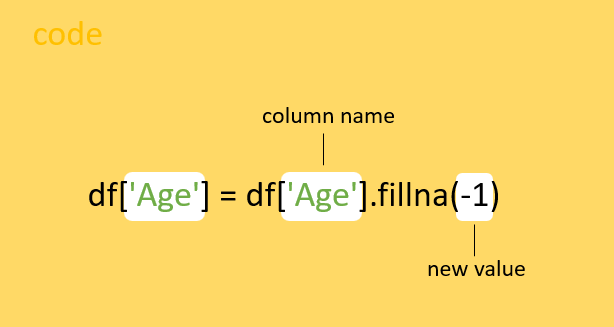![jupyter](./pict/fillna.png)

In [ ]:
df['Age'] = df['Age'].fillna(-1)

Rows with null values are discarded using the `dropna()` method. It removes any line where there is at least one missing value.

This method has arguments:
- subset = [  ]. Its value indicates the names of the columns where to look for gaps.
- Already familiar to us inplace.

In [ ]:
df.dropna(subset = ['Age', 'Fare'], inplace = True) 

![jupyter](./pict/dropna.png)

to remove all columns with empty value in a table, just use the `axis` argument. If this argument is set to `columns`, it will remove any column that has at least one empty value.

![jupyter](./pict/dropnaaxis.png)

In [ ]:
df.dropna(axis = 'columns', inplace = True) 

#### Duplicate Handling

Rough duplicates - repetitions - are detected by the `duplicated()` method. It returns a `Series` that is True if there are duplicates and False if there are none.

In [ ]:
print(df.duplicated().sum())

There is a method to remove duplicates:

In [ ]:
df.drop_duplicates(inplace = True) 

When the `drop_duplicates()` method is called, their indexes are removed along with the duplicate rows.
The sequence of indices is broken: 0 is followed by 2, and so on.

Therefore, the `drop_duplicates()` call is chained with the `reset_index()` method call. Then a new DataFrame is created, where the old indexes are turned into a regular column called index, and the indexes of all rows again follow in natural order.
If we do not want to create a new index column, then when calling `reset_index()`, the `drop argument` is passed with a value of `True`. All indices are rewritten in ascending order, without gaps.

Here is the code that saves the table, cleaned of duplicates, with new indexing, in the df variable.

In [ ]:
df = df.drop_duplicates().reset_index(drop=True) 

![jupyter](./pict/dropdup.png)

Duplicate category names are harder to track down, but still possible. To view all unique values in a column, use the `unique()` method.

In [ ]:
df['Sex'].unique()

In [ ]:
n = n /10000

We need to replace this artifact (sex = fm) with the correct one.
Such tasks are solved by the `replace()` method, where the first argument is the current value, and the second is the new, desired one.

In [ ]:
df['Sex'] = df['Sex'].replace(' ', '').replace('fm', 'female') 

In [ ]:
df['Sex'].unique()